In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [7]:
x = np.array([2, 4, 5, 3, 6, 5, 7])
y = np.array([35, 60, 20, 50, 50, 55, 60])

In [9]:
# Create the DataFrame
df = pd.DataFrame ({'x': x,'y': y})
df

,x,y
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


***Using sklearn to perform linear regression***

In [12]:
X = df[['x']]
y = df['y']


In [16]:
model = LinearRegression().fit(X,y)   #training model

35.16129032258065

In [17]:
slope_sklearn = model.coef_
slope_sklearn

array([2.62096774])

In [18]:
intercept_sklearn = model.intercept_
intercept_sklearn

35.16129032258065

In [25]:
model.predict([[6]])

C:\Users\Selina Khatun Bela\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([50.88709677])

***Manual calculations***   
    
1. Slope, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2)
2. Intercept, c = ȳ - m * x̄

In [21]:
mean_x = np.mean(x)
mean_y = np.mean(y)
slope_raw = np.sum((x - mean_x) * (y - mean_y)) / np.sum((x - mean_x) **2)
slope_raw

2.620967741935484

In [22]:
intercept_raw = mean_y - slope_raw * mean_x 
intercept_raw

35.16129032258065

In [28]:
independent_x  = 6 *slope_raw + intercept_raw
independent_x 

50.88709677419355

**Copmarison**

In [29]:
#sklearn
(slope_sklearn, intercept_sklearn, model.predict([[6]]))

C:\Users\Selina Khatun Bela\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(array([2.62096774]), 35.16129032258065, array([50.88709677]))

In [30]:
#Raw formula 
(slope_raw, intercept_raw, independent_x)

(2.620967741935484, 35.16129032258065, 50.88709677419355)

**Residual Calculation**

In [31]:
X

,x
0,2
1,4
2,5
3,3
4,6
5,5
6,7


In [32]:
model.predict(X)

array([40.40322581, 45.64516129, 48.26612903, 43.02419355, 50.88709677,
       48.26612903, 53.50806452])

In [34]:

df = pd.DataFrame ({'x': x,'y': y, 'y_hat' : model.predict(X)  })
df

,x,y,y_hat
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


Text(0.5, 1.0, 'Weight and Price ratio')

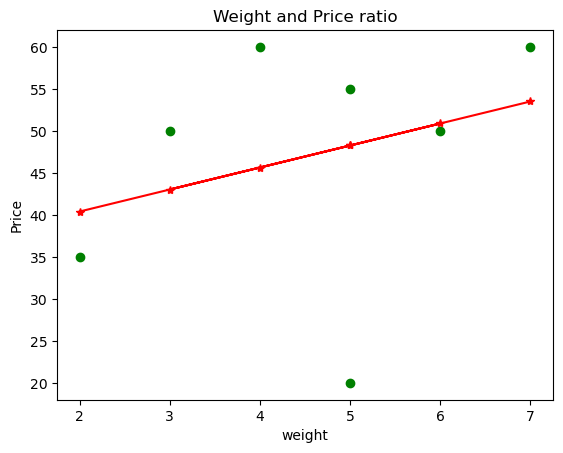

In [48]:
plt.plot(X, model.predict(X), marker='*', color='red') #best fit line
plt.scatter( X , y, color='green', marker='o')
plt.xlabel('weight')
plt.ylabel('Price')
plt.title('Weight and Price ratio')

**Calculate residuals**


#adding new column in df named Residuals
df['Residuals'] = df['y'] - df['y_hat']
df

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(df['y'], df['y_hat']) # actural y, predicted y
mse

167.30990783410135

In [40]:
mae = mean_absolute_error(df['y'], df['y_hat']) # actural y, predicted y
mae

9.87327188940092

**Display the DataFrame with the residuals and the calculated losses**



In [43]:
df

,x,y,y_hat,Residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


In [44]:
print(f"MAE = {mae:.2f}, MSE = {mse:.2f}") #2 DIGIT after dot.

MAE = 9.87, MSE = 167.31
